In [1]:
# Data Manipulation Tools
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans #For clustering

# Data Visualization Tools
import seaborn as sns           
import plotly.graph_objs as go # version=2.7.0
import matplotlib.pyplot as plt

# Data Overview

In [25]:

# pd.options.display.float_format =  '{:,.5f}'.format

# Transform df(Dataframe) to numeric dtype
df = pd.read_excel("Datasets_cleaned.xlsx", 0)
# cols = df.columns

# cols
print(df.columns)

Index(['indicator', 'population', 'gdp_per_cap', 'gdp', 'gdp_growth',
       'gdp_per_km2', 'land_area', 'population_density', 'total_foreign_born',
       'per_foreign_born', 'population_living_abroad_diaspora',
       'population_living_abroad', 'happy_planet_index', 'world_happiness',
       'human_development_index', 'health_expenditure', 'government_spending',
       'sustainable_economic_development_assessment(seda)', 'employment',
       'political_stability&absence_of_violence', 'control_of_corruption',
       'judicial_effectiveness', 'government_integrity', 'property_rights',
       'tax_burden', 'overall_economic_freedom', 'financial_freedom'],
      dtype='object')


In [26]:
print(df.describe())

           population  gdp_per_cap           gdp      gdp_per_km2  \
count        67.00000     67.00000      67.00000         67.00000   
mean  1,873,134.32836     42.46866  21,050.87015  4,926,014.63806   
std   1,565,981.35458     70.89179  24,102.55335 13,309,816.67525   
min     100,000.00000      0.20000     651.90000      5,136.56852   
25%     450,000.00000      3.45000   6,107.70000    199,950.89965   
50%   1,300,000.00000     18.40000  11,840.20000    812,864.46369   
75%   3,000,000.00000     40.35000  26,656.00000  2,714,976.69619   
max   4,900,000.00000    329.20000 127,659.60000 88,026,315.78947   

            land_area  population_density  government_spending  
count        67.00000            67.00000             67.00000  
mean    112,900.59701           187.12315             58.40149  
std     261,572.49117           345.60623             20.51883  
min         298.00000             1.97974              0.00000  
25%       4,580.50000            26.84716            

# Data Processing

## Data Cleaning

In [30]:
## Clean columns
df = df.drop(columns=["happy_planet_index","world_happiness"], errors='ignore')

# Transform to float type
for i in df.columns[1:]:
    # The reason to use pd.to_numeric instead of astyle 
    # is that the former transforms invalid data to NaN,
    # while the other does not.
    df[i] = pd.to_numeric(df[i],downcast='float', errors='coerce')

## Data Preprocessing

missing values:drop rows that have more than 20% NAN, and drop happiness planet and world happiness index

In [31]:
## Clean rows
df = df.dropna(thresh=len(df.columns)*0.7)

df

,indicator,population,gdp_per_cap,gdp,gdp_growth,gdp_per_km2,land_area,population_density,total_foreign_born,per_foreign_born,...,sustainable_economic_development_assessment(seda),employment,political_stability&absence_of_violence,control_of_corruption,judicial_effectiveness,government_integrity,property_rights,tax_burden,overall_economic_freedom,financial_freedom
0,Albania,"2,900,000.00000",34.20000,"11,840.20020",1.50000,"1,248,266.25000","27,398.00000",104.87070,"57,616.00000",3.10000,...,53.10000,91.50000,-2.78000,-1.52000,28.20000,26.20000,17.90000,91.80000,51.30000,10.00000
1,Armenia,"3,000,000.00000",25.80000,"8,621.00000",2.60000,"914,796.31250","28,203.00000",102.93115,"191,199.00000",10.60000,...,51.70000,83.70000,0.40000,-0.42000,25.40000,39.90000,54.10000,85.10000,64.50000,70.00000
2,Bahamas,"400,000.00000",9.00000,"24,555.19922",3.70000,"899,100.87500","10,010.00000",39.49660,"59,306.00000",16.30000,...,60.40000,88.80000,-0.96000,-0.61000,35.20000,29.00000,27.80000,74.00000,44.70000,30.00000
4,Barbados,"300,000.00000",4.80000,"17,100.19922",3.00000,"11,162,791.00000",430.00000,664.46277,"34,475.00000",11.30000,...,60.80000,93.40000,-0.29000,-1.41000,25.40000,18.90000,36.00000,82.40000,48.60000,40.00000
6,Bhutan,"800,000.00000",6.50000,"8,227.40039",1.20000,"169,297.28125","38,394.00000",21.18766,"51,106.00000",6.70000,...,47.70000,93.40000,0.18000,-0.26000,44.50000,32.60000,40.80000,65.70000,52.30000,60.00000
7,Bosnia and Herzegovina,"3,900,000.00000",42.20000,"10,957.50000",3.00000,"824,428.06250","51,187.00000",68.49643,"34,803.00000",0.60000,...,50.20000,83.20000,-0.71000,-0.56000,47.40000,40.50000,55.30000,84.70000,68.70000,70.00000
8,Botswana,"2,200,000.00000",36.70000,"17,041.59961",2.50000,"64,757.46875","566,730.00000",4.04366,"160,644.00000",7.20000,...,44.10000,94.30000,0.90000,1.80000,93.40000,77.40000,78.70000,63.00000,80.90000,90.00000
9,Brunei Darussalam,"400,000.00000",32.50000,"76,884.00000",0.90000,"6,172,839.50000","5,265.00000",81.34668,"102,733.00000",49.30000,...,72.50000,93.90000,1.04000,1.53000,80.90000,73.50000,83.50000,49.90000,71.80000,70.00000
10,Cabo Verde,"500,000.00000",3.50000,"6,662.00000",1.10000,"867,840.31250","4,033.00000",135.58015,"14,924.00000",3.00000,...,nan,94.90000,-0.76000,-0.88000,36.80000,39.90000,53.60000,87.50000,64.30000,60.00000
11,Central African Republic,"4,900,000.00000",3.20000,651.90002,0.50000,"5,136.56836","622,984.00000",7.47870,"81,598.00000",2.90000,...,16.10000,84.70000,1.00000,1.17000,53.50000,50.90000,46.50000,96.50000,63.30000,60.00000


## Data Transformation

It turned out that normalization (linearly from 0 to 1) isn't good for a dataset like this for too many outliers.
We switch to standarization

In [5]:
# Normalize the data except a few cols

# # Create a minimum and maximum processor object
# min_max_scaler = preprocessing.MinMaxScaler()

# # Create an object to transform the data to fit minmax processor
# df_norm[df_norm.columns[1:]] = min_max_scaler.fit_transform(df[df_norm.columns[1:]])

## Data Standarization

df_norm = df.copy()

# std = std.dropna(how='any')

df_norm[df_norm.columns[1:]] = preprocessing.scale(df_norm[df_norm.columns[1:]])


# df_norm.describe()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning:

Data with input dtype float32 were all converted to float64 by the scale function.



,population,gdp_per_cap,gdp,gdp_growth,gdp_per_km2,land_area,population_density,total_foreign_born,per_foreign_born,population_living_abroad_diaspora,...,sustainable_economic_development_assessment(seda),employment,political_stability&absence_of_violence,control_of_corruption,judicial_effectiveness,government_integrity,property_rights,tax_burden,overall_economic_freedom,financial_freedom
count,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000,64.00000,64.00000,64.00000,...,46.00000,64.00000,64.00000,64.00000,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000
mean,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,...,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000
std,1.00778,1.00778,1.00778,1.00778,1.00778,1.00778,1.00778,1.00791,1.00791,1.00791,...,1.01105,1.00791,1.00791,1.00791,1.00778,1.00778,1.00778,1.00778,1.00778,1.00778
min,-1.15279,-0.59686,-0.84082,-4.32306,-0.43846,-0.44005,-0.59460,-0.46968,-0.76103,-0.78808,...,-5.11444,-3.27375,-2.90097,-1.75474,-1.78433,-1.34947,-1.63901,-2.64631,-2.66445,-2.05991
25%,-0.89727,-0.55052,-0.63619,-0.40885,-0.41186,-0.42169,-0.48721,-0.44627,-0.59990,-0.63302,...,-0.32448,-0.38002,-0.65938,-0.62169,-0.87710,-0.79128,-0.71615,-0.38544,-0.70664,-0.52090
50%,-0.32235,-0.34126,-0.37373,0.00317,-0.34316,-0.35303,-0.32941,-0.34889,-0.31325,-0.42974,...,0.08584,0.28898,0.14196,-0.23752,-0.06457,-0.26157,-0.04077,0.13568,0.03233,-0.00789
75%,0.69973,-0.05896,0.20531,0.53291,-0.16237,-0.17923,0.01963,-0.10795,0.12774,0.22297,...,0.56037,0.64129,0.83230,0.75451,0.57348,0.54154,0.65524,0.68887,0.75212,0.50511
max,1.91345,4.02372,4.46156,2.26929,6.02048,5.46691,4.77406,5.00718,4.23914,3.99662,...,1.33748,1.38155,1.39811,2.18420,2.37300,2.75721,2.04210,2.04378,2.03813,2.04413


## Data Integration

## Data Visualization for overview

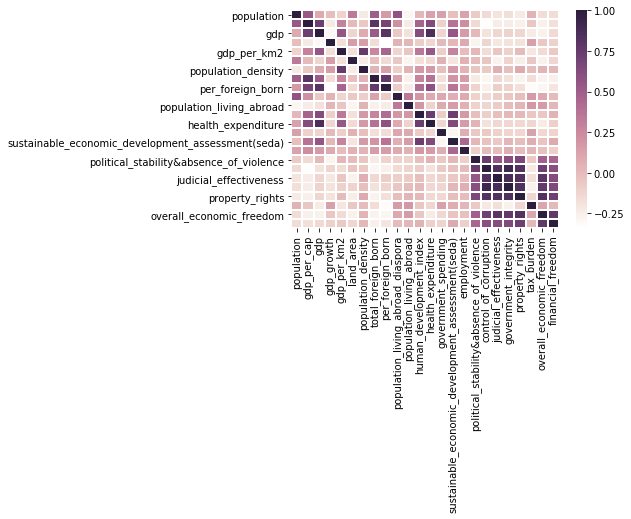

In [6]:
# Subset the data to key cols
# Visualize correlation in a heapmap

cols_name = df_norm.columns
df_corr = df_norm[cols_name]
cor = df_corr[1:].corr()

# Color palette
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cor, 
#             square = True, 
            linewidths = 1,
           cmap = cmap)

population gdp_per_cap


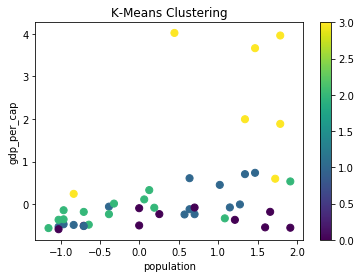

In [7]:
#K means Clustering

df_kmeans = df_norm.dropna(axis='index', how='any')

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)


sample = df_kmeans[df_kmeans.columns[1:]]
# print(sample)
clust_labels, cent = doKmeans(sample, 4)
kmeans = pd.DataFrame(clust_labels)
sample.insert((sample.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
axis1 = cols_name[1]
axis2 = cols_name[2]
print(axis1, axis2)
scatter = ax.scatter(sample[axis1],sample[axis2],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel(axis1)
ax.set_ylabel(axis2)
plt.colorbar(scatter)


In [36]:
#choropleth-maps
#Ref: https://plot.ly/python/choropleth-maps/
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

axis = cols_name[2] #'gdp_per_capita'
# axis = 'population'

data = dict(type = 'choropleth', 
           locations = df_norm['indicator'],
           locationmode = 'country names',
           z = df_norm[axis], 
           text = df_norm['indicator'],
           colorbar = {'title':axis},
           marker = dict(
            line = dict (
#                 color = 'rgb(180,180,180)',
                width = 0.5
            ) )
           )

scope = 'globe'
# scope = 'asia'

layout = dict(title = axis2, 
             geo = dict(scope=scope,
                        showframe = False, 
                       projection = {'type': 'Mercator'})
             )

choromap3 = go.Figure(data = [data], layout=layout)

iplot(choromap3)

## Add Continent Column to valid data

In [9]:
import country_converter as converter

countries = list(df_norm.indicator.values)

df_norm['continent'] = converter.convert(names=countries, to='continent') 

# df_norm['continent']

In [76]:
df_norm[cols_name[1:]].loc[0].values

array([ 0.63585082, -0.11935518, -0.37372741, -0.29113191, -0.29178519,
       -0.33699407, -0.21428809, -0.36406527, -0.55749416,  2.46398993,
        1.29700745,  0.48616003, -0.35585942,  0.70427717,  0.00529987,
        0.0831304 , -2.90096556, -1.45324533, -0.87709562, -0.86532397,
       -1.6235437 ,  1.39438407, -0.8026131 , -2.059913  ])

## Overview for all nations

In [98]:
directions=dict(
    life=['population_density','human_development_index','health_expenditure','employment'],
    economics=['gdp_per_cap','gdp_growth', 
               'sustainable_economic_development_assessment(seda)','overall_economic_freedom'],
    government=['political_stability&absence_of_violence','control_of_corruption',
                'tax_burden','government_spending'],
    laws=['property_rights','government_integrity',
          'judicial_effectiveness','financial_freedom'],
    migration=['total_foreign_born','per_foreign_born',
               'population_living_abroad_diaspora','population_living_abroad']
)

Legend

In [348]:
# import plotly.plotly as py
# import plotly.graph_objs as go

data = []
color = "rgba(255,255,255,0)"


def format(l):
    return list(l).append(list(l)[0])

# theta = list(cols_name[1:])
# theta.append(cols_name[1])
# print(theta)

# r=list(df_norm[cols_name[1:]].iloc[i].values)+[df_norm[cols_name[1]].iloc[i]]

# order = []
# for k, v in directions.items():
#     order += v
# print(order)

alpha='99'

colors=['D94F70'+alpha,'F0C05A'+alpha,'45B5AA'+alpha,'5A5B9F'+alpha,'9B1B30'+alpha]
colors=['45B5AA','ffa600', 'ff6361','bc5090',
#         '58508d',
        '003f5c']
colors=[i+alpha for i in colors]

extra_theta=['a','b','c','d','e','f','g','h','i']

range_min = -5
range_max = 5

offset = 2.5

bgcolor="rgb(224,225,227)"

for i in range(len(df_norm)):
    if i >=1:
        break
    
    for index,k in enumerate(directions.keys()):
        
        r = df_norm[directions[k]].iloc[i].values
        theta = directions[k].copy()
        
        r = list(r)
        prevkey = extra_theta[(index)%len(extra_theta)]
        nextkey=extra_theta[(index+1)%len(extra_theta)]
        r = [range_min+offset] + r + [range_min+offset] 
        theta = [prevkey] + theta + [nextkey]
        
        data.append(go.Scatterpolar(
            name = df_norm['indicator'].iloc[i], #Nation as the trace name
            mode = "lines,markers",
            marker = dict(
#                 color = "rgba(180,120,150,0.4)",
                color = colors[index]

            ),
            r=r,
            theta=theta,
            line = dict(
                shape = "spline",
#                 color = "rgba(180,120,150,0.3)",
                color=[colors[index]],
#                 dash='dot', #"solid", "dot", "dash", "longdash", "dashdot", or "longdashdot"
                smoothing = 1.3,
                width=4
            ),
            hoverlabel=dict(
                namelength=20
            )
        ))

#Add a black angle
data.append(go.Scatterpolar(
        name = df_norm['indicator'].iloc[i], #Nation as the trace name
        mode = "lines",
        marker = dict(
            color = "rgba(180,120,150,0)",

        ),
        r=[0,0,0,0,0],
        theta=['f','g','h','i','j'],
        line = dict(
#             shape = "spline",
            color=[colors[index]],
            smoothing = 1.3
        ),
        hoverlabel=dict(
            namelength=20
        )
    )
)
        
        
layout = go.Layout(
    showlegend = False,
    polar=dict(
        bgcolor=bgcolor,
        sector=[119,420],
        angularaxis=dict(
            showline=False, # the grid's outline
#             visible=True,
            showticklabels=False,
            tickfont = dict(
                size = 8
            ),
            ticks = "outside",
            nticks = 30,
            direction = "clockwise",
            rotation = 60,
#             gridcolor = "rgb(133,134,136,0.4)",
            gridcolor="white",
            gridwidth = 1
        ),
        radialaxis=dict(
            angle = 60,
            showline=False, # the tick line
            showticklabels=False,
            visible=True,
            nticks=4,
            range = [range_min,range_max],
#             gridcolor = "rgb(133,134,136)",
            gridwidth = 2,
            gridcolor = "white", #the tick line
        )
    ),

    paper_bgcolor=bgcolor,
        

    
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(width=800,height=800)
iplot(fig)

Legend of the markers and lines

In [366]:
data=[]

for i in range(len(df_norm)):
    
    if i <1:
        continue
    
    if i >2:
        break
    
    for index,k in enumerate(directions.keys()):
        
#         if index>=3:
#             break
        
        r = df_norm[directions[k]].iloc[i].values
        theta = directions[k].copy()
        
        r = list(r)
        prevkey = extra_theta[(index)%len(extra_theta)]
        nextkey=extra_theta[(index+1)%len(extra_theta)]
        r = [range_min+offset] + r + [range_min+offset]   
        theta = [prevkey] + theta + [nextkey]

        
        
        data.append(go.Scatterpolar(
            name = "Country "+str(i), #Nation as the trace name
            mode = "markers,lines",
            marker = dict(
                color = colors[index],
                size=14
            ),
            r=r,
            theta=theta,
            line = dict(
                shape = "spline",
                color=[colors[index]],
                smoothing = 1.3,
                width=8
            ),
            hoverlabel=dict(
                namelength=20
            )
        ))

#Add a black angle
data.append(go.Scatterpolar(
        name = df_norm['indicator'].iloc[i], #Nation as the trace name
        mode = "lines",
        marker = dict(
            color = "rgba(180,120,150,0)",

        ),
        r=[0,0,0,0,0],
        theta=['f','g','h','i','j'],
        line = dict(
#             shape = "spline",
            color=[colors[index]],
            smoothing = 1.3
        ),
        hoverlabel=dict(
            namelength=20
        )
    )
)
        
        
layout = go.Layout(
    showlegend = False,
    polar=dict(
        
        bgcolor=bgcolor,
        sector=[0,59],
        angularaxis=dict(
            showline=False, # the grid's outline
#             visible=True,
            showticklabels=False,
            tickfont = dict(
                size = 8
            ),
            ticks = "outside",
            nticks = 30,
            direction = "clockwise",
            rotation = 60,
            gridcolor = "rgba(133,134,136,0.7)",
            gridwidth = 4
        ),
        radialaxis=dict(
#             angle = 60,
            showline=True, # the tick line
            showticklabels=True,
            visible=True,
            nticks=6,
            range = [range_min,range_max],
            gridcolor = "rgba(255,255,255,0.4)",
            gridwidth = 8,
#             linecolor = "white", #the tick line
            tickfont=dict(
                size=28,
                family="doris serif")
            )
    ),

    paper_bgcolor=bgcolor,
        

    
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(width=800,height=800)
iplot(fig)

In [339]:
df_sorted = df_norm.sort_values(by=['continent', 'indicator'])

## Access row using .iloc[]
# df_sorted.iloc[0]

## Overview for each continent

In [341]:
from plotly import tools
from random import randint

total= df_norm['continent'].nunique()


traces = []
subplot_titles = []

#format
theta = list(df_norm.columns[1:-1])
# theta.append(df_norm.columns[1])

# print(theta)

# colors=['D94F70','45B5AA','F0C05A','5A5B9F','9B1B30']

# Plot one subplot 
def draw_one_nation(data, subplot):
    
#     format_data=list(data[1:-1])
#     format_data.append(format_data[0])

    result_list = []
    
    for index,k in enumerate(directions.keys()):
        
#         r = data[directions[k]].iloc[i].values
        r = data[directions[k]]
        theta = directions[k].copy()
        
        r = list(r)
        prevkey = extra_theta[(index)%len(extra_theta)]
        nextkey=extra_theta[(index+1)%len(extra_theta)]
        r = [range_min+offset] + r + [range_min+offset] 
        theta = [prevkey] + theta + [nextkey]
        
        result_list.append(go.Scatterpolar(
#             name = data[0], # country name
            subplot = subplot,
            r = r,
            theta = theta,
            mode = "lines",
#             fill = "toself",
#             fillcolor = "rgba(180,120,150,0.2)",
            line = dict(
                shape = "spline",
#                 color = "rgba(180,120,150,0.4)",
                color=colors[index],
            ) 
        )
        )
        
  
        
    return result_list

    

# Plot for group of continents
continents = df_norm.groupby('continent')
data = []
    
# ga_index = continents.groups['America']
# ga = continents.get_group('America')

i = 0

for continent, nations in continents:

    subplot = "polar"
    if i != 0:
        subplot += str(i+1)
    i+=1
    
    for i_nation in range(len(nations)):
        nation = nations.iloc[i_nation]
        data+=(draw_one_nation(nation, subplot))
    
    
    #Add a blank angle
    data.append(go.Scatterpolar(
    #         name = df_norm['indicator'].iloc[i], #Nation as the trace name
            subplot = subplot,
            mode = "lines",
            marker = dict(
                color = "rgba(180,120,150,0)",

            ),
            r=[0,0,0,0,0],
            theta=['f','g','h','i','j'],
            line = dict(
    #             shape = "spline",
                color=[colors[index]],
                smoothing = 1.3
            ),
            hoverlabel=dict(
                namelength=20
            )
        )
    )
    


    
# Subplot format
total = 5
cols = 2
rows = total//cols+1


width = 1/cols*0.95
height = 1/rows*0.95

w_offset = 1/cols*0
h_offset = 1/rows*0

polars = dict()
for i, continent in enumerate(continents):
    subplot = "polar"

    if i!=0:
        subplot += str(i+1)
        
    col = i % cols
    row = i // cols

    x = [(width+w_offset)*(col), width*(col+1) + w_offset*col]
    y = [1-height*(row+1)-h_offset*row, 1-(height+h_offset)*(row)]
        
    print(continent[0], col, row)

    
    polars[subplot] = dict(
        
        domain = dict(
            x = x,
            y = y
        ),
#         angularaxis=dict(
#             tickfont = dict(
#                 size = 10 
#             ),
#             ticks = "outside",
#             rotation = 90,
#             direction = "clockwise"
#         ),
#         radialaxis = dict(
#             visible = True,
#             tickfont = dict(
#                 size = 6 
#             ),
#             nticks = 6,
#             range = [-3, 3]
#         )
        bgcolor=bgcolor,
        sector=[119,420],
        angularaxis=dict(
            showline=False, # the grid's outline
            visible=False,
            showticklabels=False,
            tickfont = dict(
                size = 8
            ),
            ticks = "outside",
#             nticks = 30,
            nticks=6,
            direction = "clockwise",
            rotation = 60,
#             gridcolor = "rgb(133,134,136,0.4)",
            gridcolor="rgba(255,255,255,0.5)",
            gridwidth = 1
        ),
        radialaxis=dict(
            angle = 60,
            showline=False, # the tick line
            showticklabels=False,
            visible=True,
            nticks=4,
            range = [range_min,range_max],
#             gridcolor = "rgb(133,134,136)",
            gridwidth = 4,
            gridcolor = "white", #the tick line
        )
    )

    
layout = go.Layout(
    showlegend = False,
#     title = "Small Nation in different Continents ",
    paper_bgcolor=bgcolor,
)


fig = go.Figure(data=data, layout=layout)
fig['layout'].update(polars)
fig['layout'].update(width=max(cols*600,800),height=rows*500)
iplot(fig)

Africa 0 0
America 1 0
Asia 0 1
Europe 1 1
Oceania 0 2
